In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

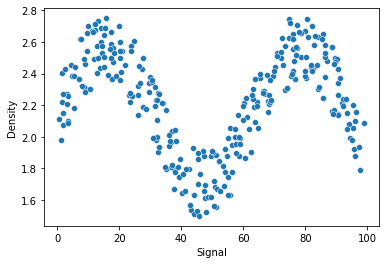

In [6]:
sns.scatterplot(x='Signal',y='Density',data=df);

In [14]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

## Comparing models function

In [58]:
def run_model(model,X_train,y_train,X_test,y_test):
    # Fit model training
    model.fit(X_train,y_train)
    
    # Get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'RMSE {rmse}')
    print(f'MAE {mae}')
    
    # Plot results
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(6,4),dpi=100)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,signal_preds);

### Linear Regression model

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr_model = LinearRegression()

RMSE 0.2570051996584629
MAE 0.211198973318633


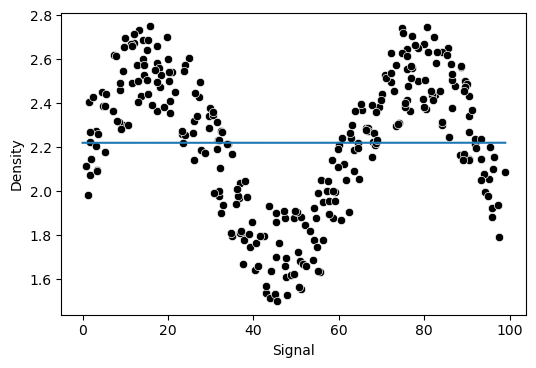

In [63]:
run_model(lr_model,X_train,y_train,X_test,y_test)

### Polynomial Regression model

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [56]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE 0.13807393264835693
MAE 0.119690915641049


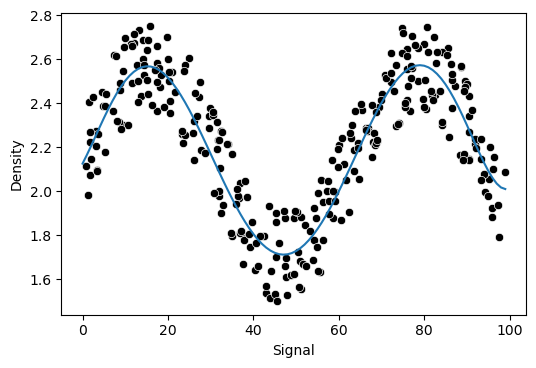

In [57]:
run_model(pipe,X_train,y_train,X_test,y_test)

### K Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsRegressor

RMSE 0.1523487028635337
MAE 0.11877297474442378
RMSE 0.13730685016923647
MAE 0.12198383614100558
RMSE 0.13277855732740926
MAE 0.11635971693292672


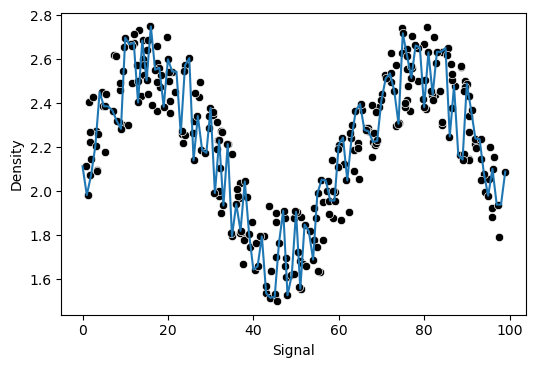

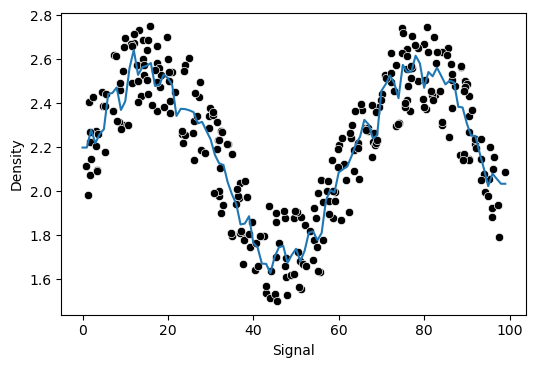

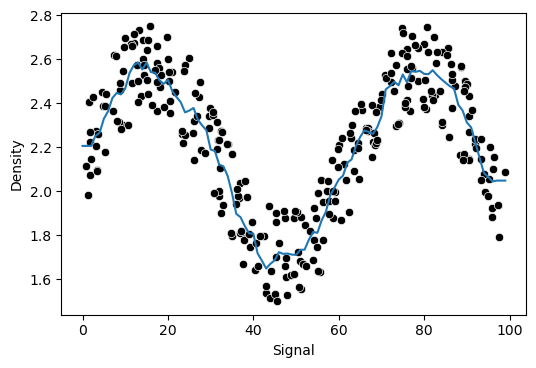

In [67]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

RMSE 0.1523487028635337
MAE 0.11877297474442378


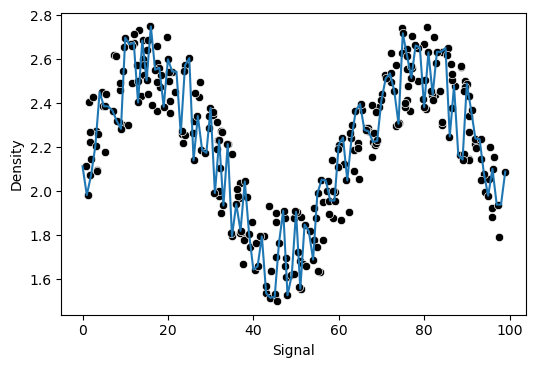

In [69]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

### Suport Vector Regressor

In [70]:
from sklearn.svm import SVR

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

RMSE 0.12646999302047557
MAE 0.10854210121349125


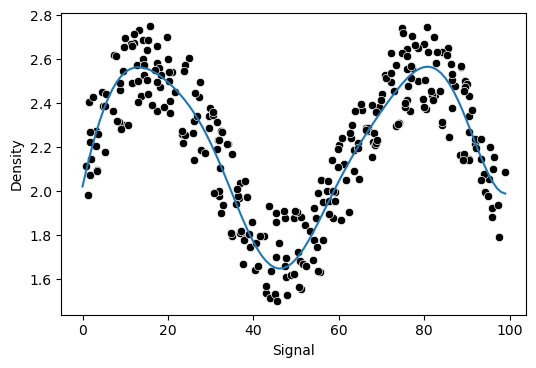

In [73]:
run_model(grid,X_train,y_train,X_test,y_test)

### Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE 0.1297913125490038
MAE 0.10950367157997026


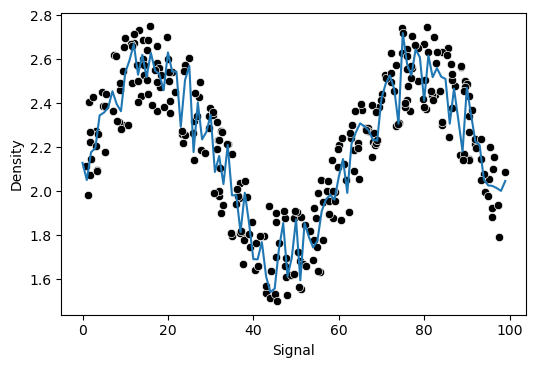

In [76]:
run_model(rfr,X_train,y_train,X_test,y_test)

### Gradient Boosting Regressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE 0.13294148649584667
MAE 0.11318284854800689


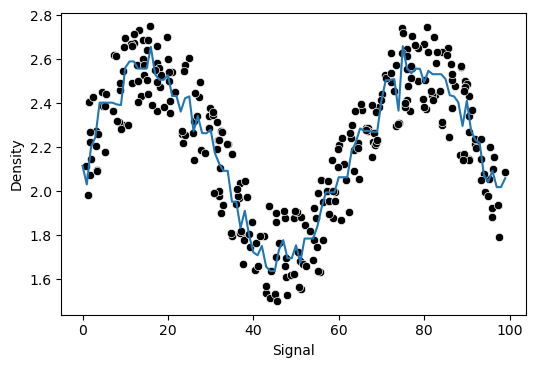

In [78]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

### AdaBoost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor

RMSE 0.14065574930476313
MAE 0.11921831652784112


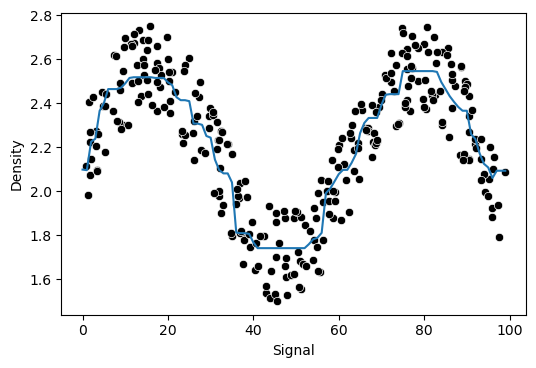

In [79]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)